# Logistic Regression Summary

A suppose you as researcher is interested in how predictor variables, such as 
1) GRE (Graduate Record Exam scores), 
2) GPA (grade point average) and 
3) rank/prestige of the undergraduate institution
affect admission into graduate school.

#The response variable "admission to grad school"  is a binary variable.


The only two choices are admit/don’t admit.
Values are 0 = no admit, 1 = admit


## THIS TASK IS CALLED CLASSIFICATION. 
CLASSIFICATION => The target output is one of a limited number of categories.
In this problem we only have two possible targets: no admit and admit

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

resources on metrics: 
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [ ]:
# It's best practices to define whatever functions you might need at the top of your notebook

In [6]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)


In [4]:
# statsmodels_train_test_split directly uses the train_test_split function from sklearn.
# You can pass the same parameters to statsmodels_train_test_split that you can pass to sklearn's train_test_split!
# So, what parameters can you pass to sklearn's 'train_test_split anyway??

train_test_split??  ## this is going to give a lot of output, but please focus on the Parameters

Signature: train_test_split(*arrays, **options)
Source:   
def train_test_split(*arrays, **options):
    """Split arrays or matrices into random train and test subsets

    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also None, it will
        be set 

In [ ]:
'''
These are the MOST IMPORTANT ARGUMENTS OF the sklearn train_test_split function (and mine as well)

train_test_split(*arrays, test_size=0.25 ,random_state=NONE , stratify=None)
'''

In [ ]:
'''
Parameters
    ----------
*arrays: 
        sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

**options (valid keyword arguments):
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also None, it will
        be set to 0.25.

    train_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the train split. If
        int, represents the absolute number of train samples. If None,
        the value is automatically set to the complement of the test size.

    random_state : int or RandomState instance, default=None
        Controls the shuffling applied to the data before applying the split.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.


    shuffle : bool, default=True
        Whether or not to shuffle the data before splitting. If shuffle=False
        then stratify must be None.

    stratify : array-like, default=None
        If not None, data is split in a stratified fashion, using this as
        the class labels.

'''

#### What does *test_size* do?

#### What does *random_state* do?

#### What does *stratify* do? We'll talk about that below. 

## IMPORTANT: **ALWAYS** use **stratify** when you do train_test_splits for logistic regression!!!

In [45]:
admissions = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [46]:
admissions.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


## Question: Which columns are categorical and which are continuous?

CHECK FOR UNDERSTANDING: Why is Classification different from Regression, a/k/a Linear Regression?

Note: The fact that you solve CLASSIFICATION problems with a technique called LOGISITIC REGRESSION is unfortunate, but a fact of life.

In [47]:
train, test = statsmodels_train_test_split(admissions)

In [48]:
train.head()

,gre,gpa,rank,admit
320,460,3.14,3,0
192,640,3.76,3,0
232,380,3.38,2,0
389,640,3.51,2,0
99,400,3.31,3,0


In [49]:
test.head()

,gre,gpa,rank,admit
15,480,3.44,3,0
386,740,3.86,2,1
390,800,3.05,2,1
157,480,3.58,1,1
268,680,3.46,2,1


In [50]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [51]:
admissions['admit'].value_counts()

0    273
1    127
Name: admit, dtype: int64

In [53]:
127/(273+127)

0.3175

In [54]:
test['admit'].value_counts()

0    65
1    35
Name: admit, dtype: int64

### admit: is the Categorical target we want to model. 
### 0 = no admit, 1 = admit

### gre is numerical/continuous.

### gpa is numerical/continuous

### rank is categorical: 1,2,3, or 4


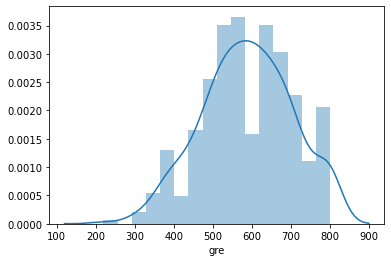

In [8]:
sns.distplot(admissions['gre'])

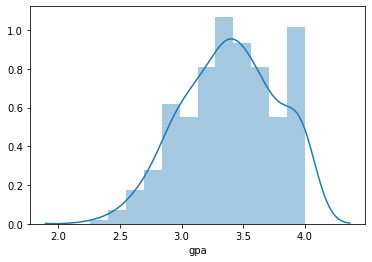

In [9]:
sns.distplot(admissions['gpa'])

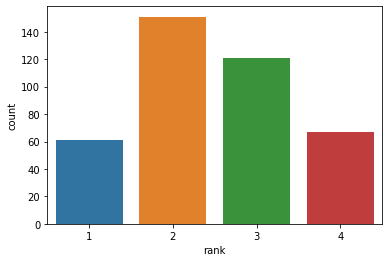

In [10]:
sns.countplot(admissions['rank'])

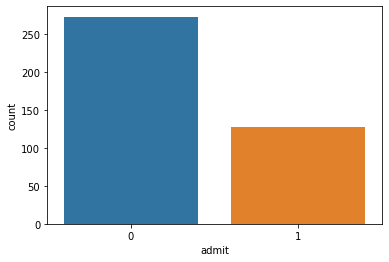

In [55]:
sns.countplot(admissions['admit'])

## You should *always* explicitly separate out Categorical factors.
## Notice this this model has three coefficients but there are four possible ranks. Why?

## To do a logistic regression model, you use the statsmodel *logit* function in the exact same way that you used the statsmodel *ols* function.

In [60]:
# Your first classification model!!!
fitted_model = smf.logit(formula='admit ~ gre + gpa + C(rank)', data=train).fit()


fitted_model.summary() 
# Note that the summary output is different than OLS
# Pseudo R-squared is a problematic metric, but it's all we have for now, so let's focus on that.

# Ideally I'd have time to teach you about Log-Likelihood as an appropriate target for how good your model is. 
#In general one model is BETTER than another if **absolute value(log-likelihood)** is closer to ZERO.

Optimization terminated successfully.
         Current function value: 0.579859
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  300
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Sep 2020   Pseudo R-squ.:                 0.05929
Time:                        12:15:09   Log-Likelihood:                -173.96
converged:                       True   LL-Null:                       -184.92
Covariance Type:            nonrobust   LLR p-value:                 0.0005401
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.8940      1.319     -2.953      0.003      -6.479      -1.309
C(rank)[T.2]    -0.4080      0.373     -1.095      0.273      -1.138       0.322
C(rank)[T.3]    -1.0071      0.402     -2.507      0.012      -1.794      -0.220
C(rank)[T.4]    -1.1675      0.476     -2.455      0.014      -2.100      -0.235
gre              0.0022      0.001      1.743      0.081      -0.000       0.005
gpa              0.7081      0.389      1.822      0.068      -0.054       1.470
================================================================================
"""

In [61]:
#A more common tool is the CONFUSION MATRIX. 
# It measures HOW WELL DID YOUR MODEL PREDICT THE REALITY OF YOUR DATA?

In [62]:
#CONFUSION MATRIX. 
# pred_table[i,j] refers to the number of times “i” was observed and the model predicted “j”. 
fitted_model.pred_table()

array([[196.,  12.],
       [ 79.,  13.]])

### The return of true positive, false positive, true negative, false negative! Work out which number is which!

true negative =

true positive = 

false positive =

false negative =

### Note: pred_table[i,j] refers to the number of times “i” was observed and the model predicted “j”. 

In [66]:
#And of course, you always want to test your model on out of sample data

In [67]:
y_pred_test = fitted_model.predict(test)

In [68]:
y_pred_test  #what ARE these numbers???

15     0.195613
386    0.513015
390    0.403705
157    0.423680
268    0.410335
         ...   
25     0.610608
128    0.297254
299    0.285655
142    0.286266
64     0.310371
Length: 100, dtype: float64

## The numbers of y_pred_test are probabilities of the POSITIVE class
## y_pred_test is the model's guess of the probability(admit=1) for each student in the test set 

In [69]:
#Let's assume for now that < 0.50 means admit=0 and >= 0.50 means admit=1 (WE GET TO DECIDE OUR THRESHOLD!!!!!)
y_prediction_test = np.round(y_pred_test)
y_prediction_test

15     0.0
386    1.0
390    0.0
157    0.0
268    0.0
      ... 
25     1.0
128    0.0
299    0.0
142    0.0
64     0.0
Length: 100, dtype: float64

In [77]:
test['admit']

15     0
386    1
390    1
157    1
268    1
      ..
25     1
128    0
299    0
142    0
64     0
Name: admit, Length: 100, dtype: int64

In [71]:
#What is the accuracy score?
accuracy_score(test['admit'], y_prediction_test)

0.71

### Question: Is 71% a good score for this data??

### Let's investigate the training and test sets to see how many students were admitted vs not-admitted

In [72]:
admissions['admit'].value_counts()

0    273
1    127
Name: admit, dtype: int64

In [73]:
train['admit'].value_counts()

0    208
1     92
Name: admit, dtype: int64

In [74]:
test['admit'].value_counts()

0    65
1    35
Name: admit, dtype: int64

In [75]:
65/(65+35)

0.65



Question for Discussion what score would we get on the test set if we ALWAYS guess admit=0???

When the data is imbalanced, it is very often the case that there are significantly more zeros than ones.

I.E. There is MORE DATA IS IN THE **NEGATIVE** CLASS THAN THE **POSITIVE** CLASS


So accuracy may or may not be the correct way to think about how good your model is!

That's why we use the *confusion matrix* to judge classification models. It gives more info about what the model got wrong and what the model got right.

In [ ]:
'''Calculate the confusion matrix for the test set
 Notes
        -----
        [i,j] refers to the number of times "i" was observed and
        the model predicted "j". Correct predictions are along the diagonal.
'''

In [76]:
confusion_matrix(test['admit'], y_prediction_test)

array([[63,  2],
       [27,  8]])

In [ ]:
TP = 8
TN = 63
FP = 2
FN = 27


In [35]:
confusion_matrix??

  """Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Source:   
@_deprecate_positional_args
def confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None,
                     normalize=None):
    """Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated tar